In [25]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
import random
import pickle
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")

plot_data_list = []

In [2]:
df = pd.read_csv('Dataset\Pima diabetes_csv.csv')
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
round(df.describe(),2)

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


In [6]:
# check null 
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

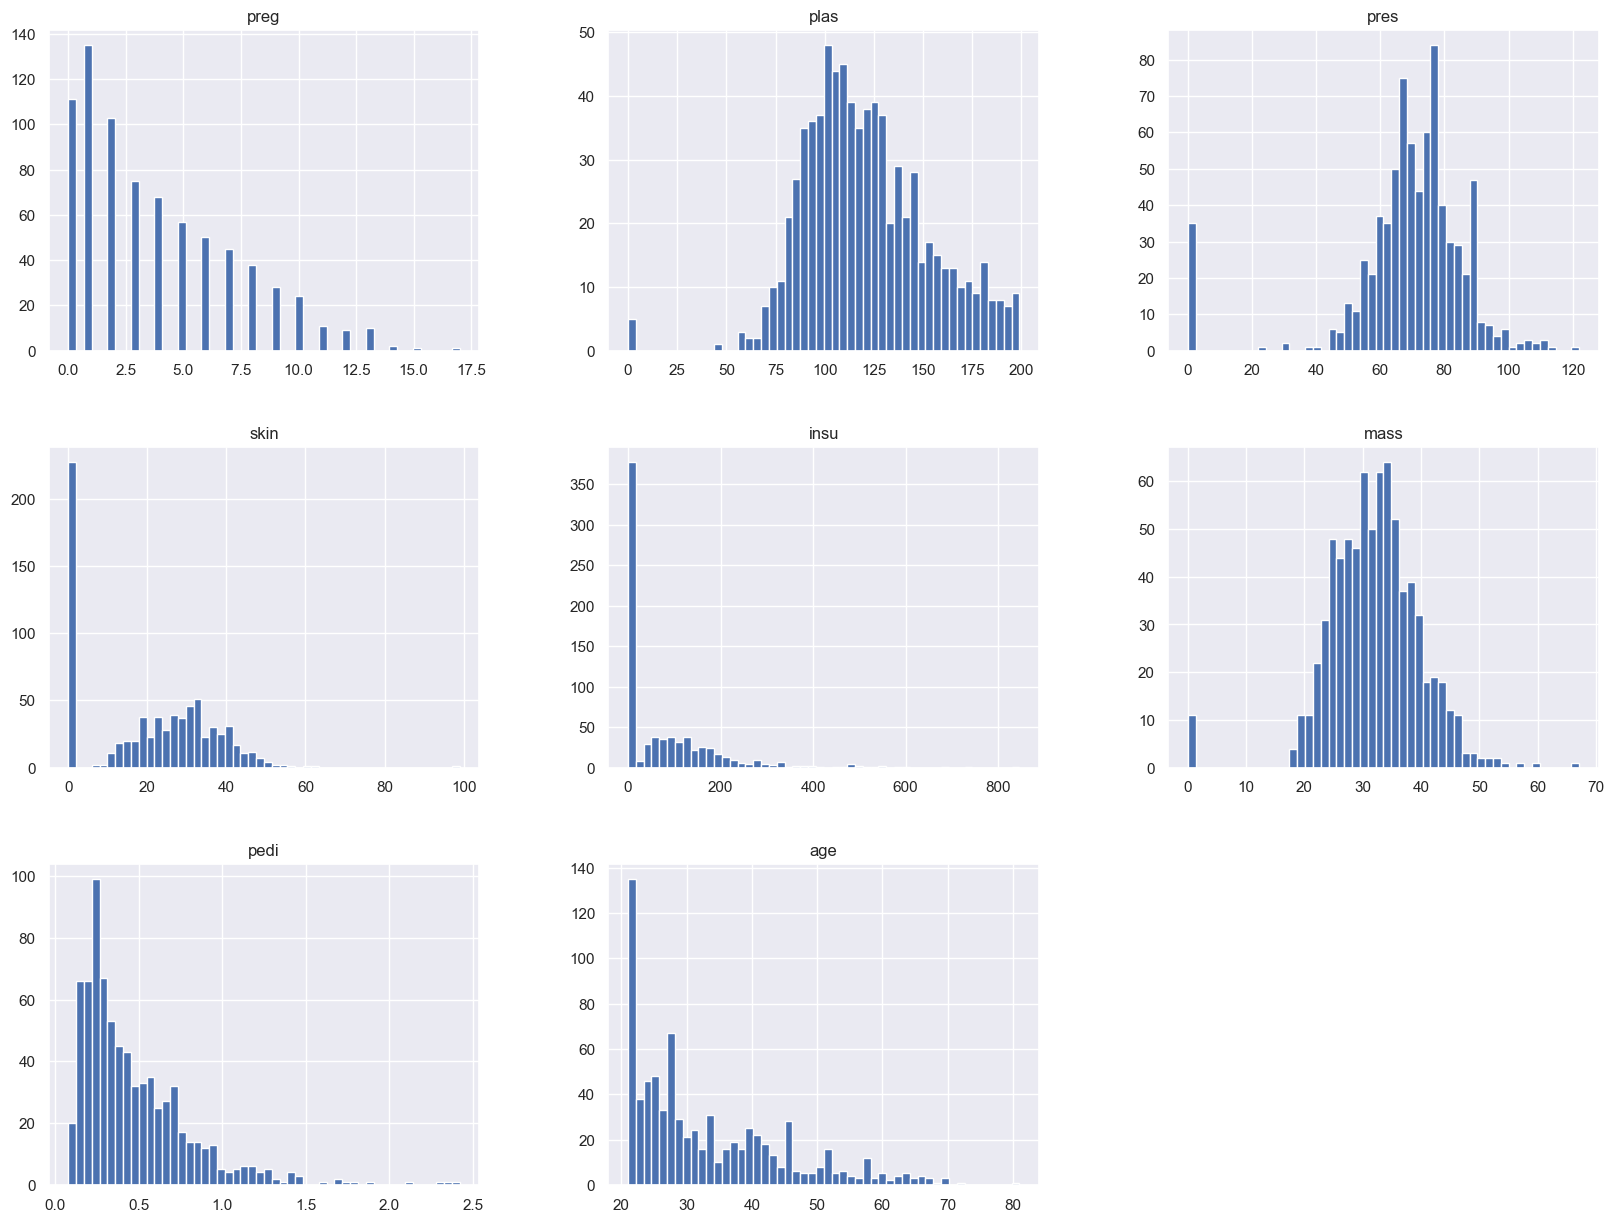

In [7]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

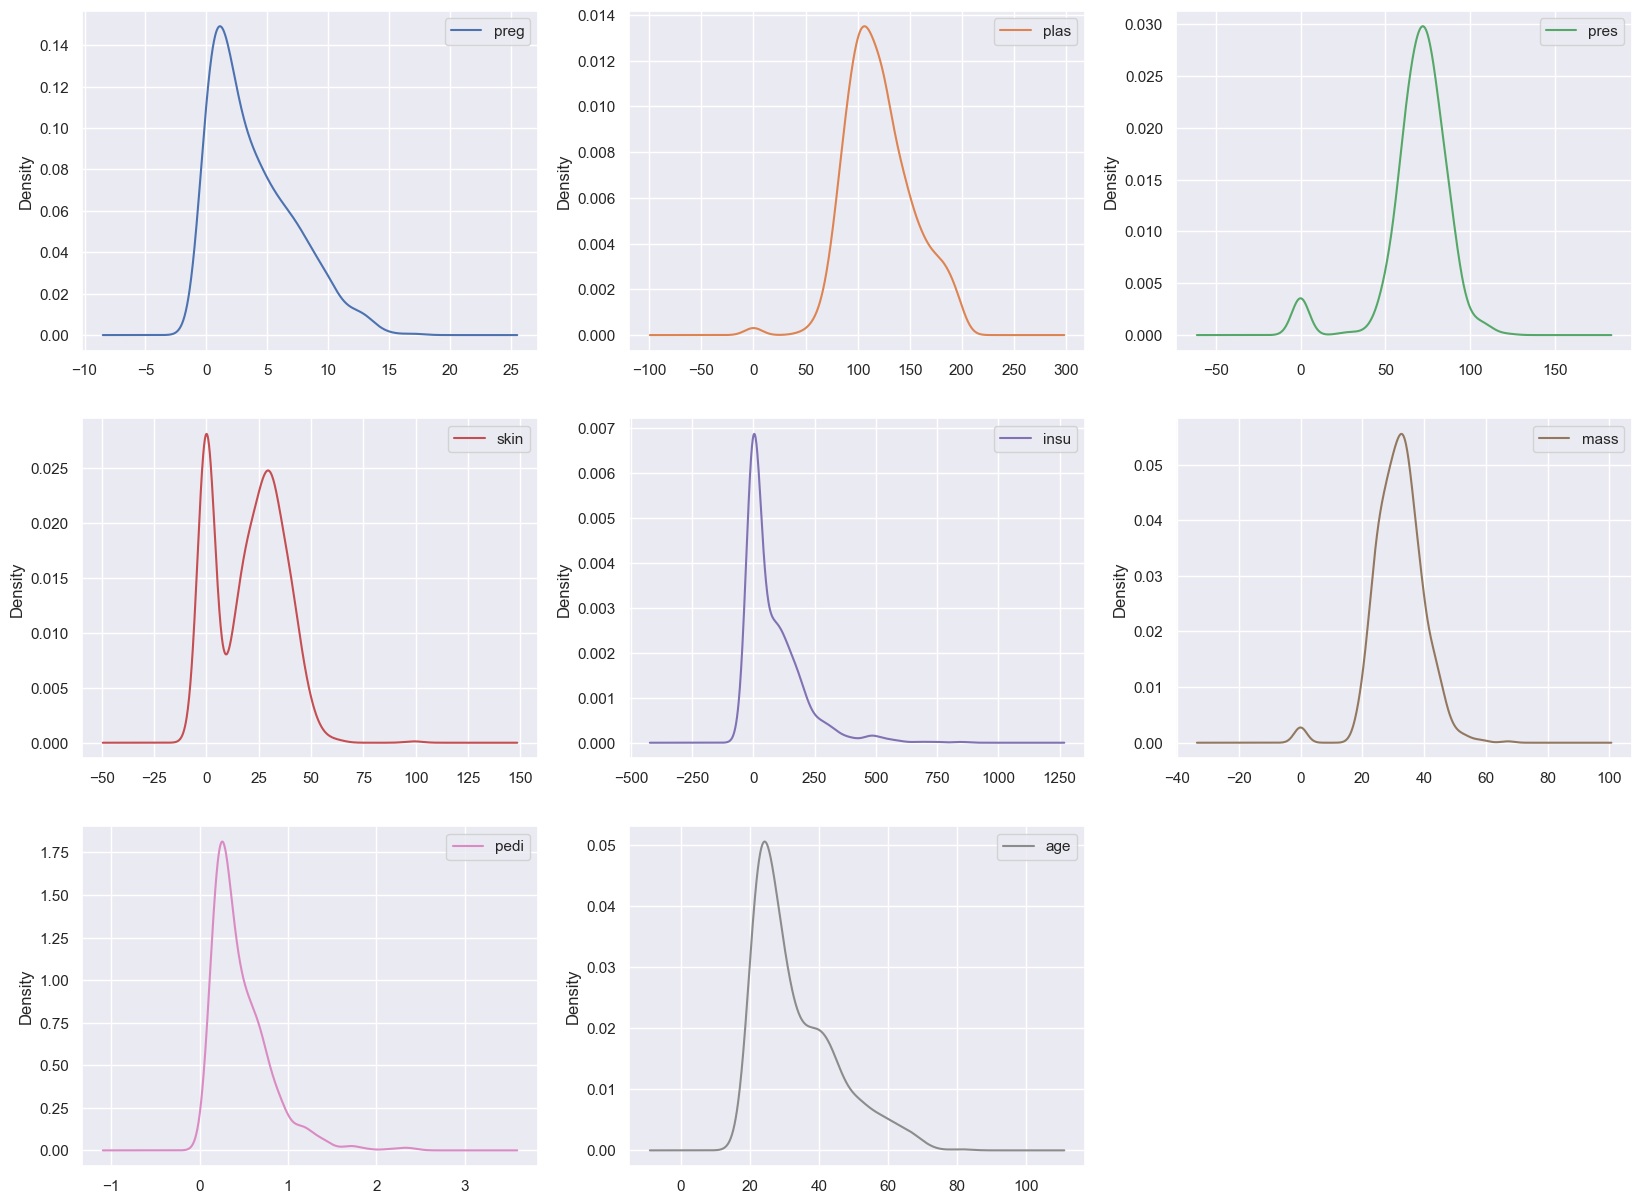

In [8]:
# Density plots for all attributes to visualize the distribution of each attribute
df.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

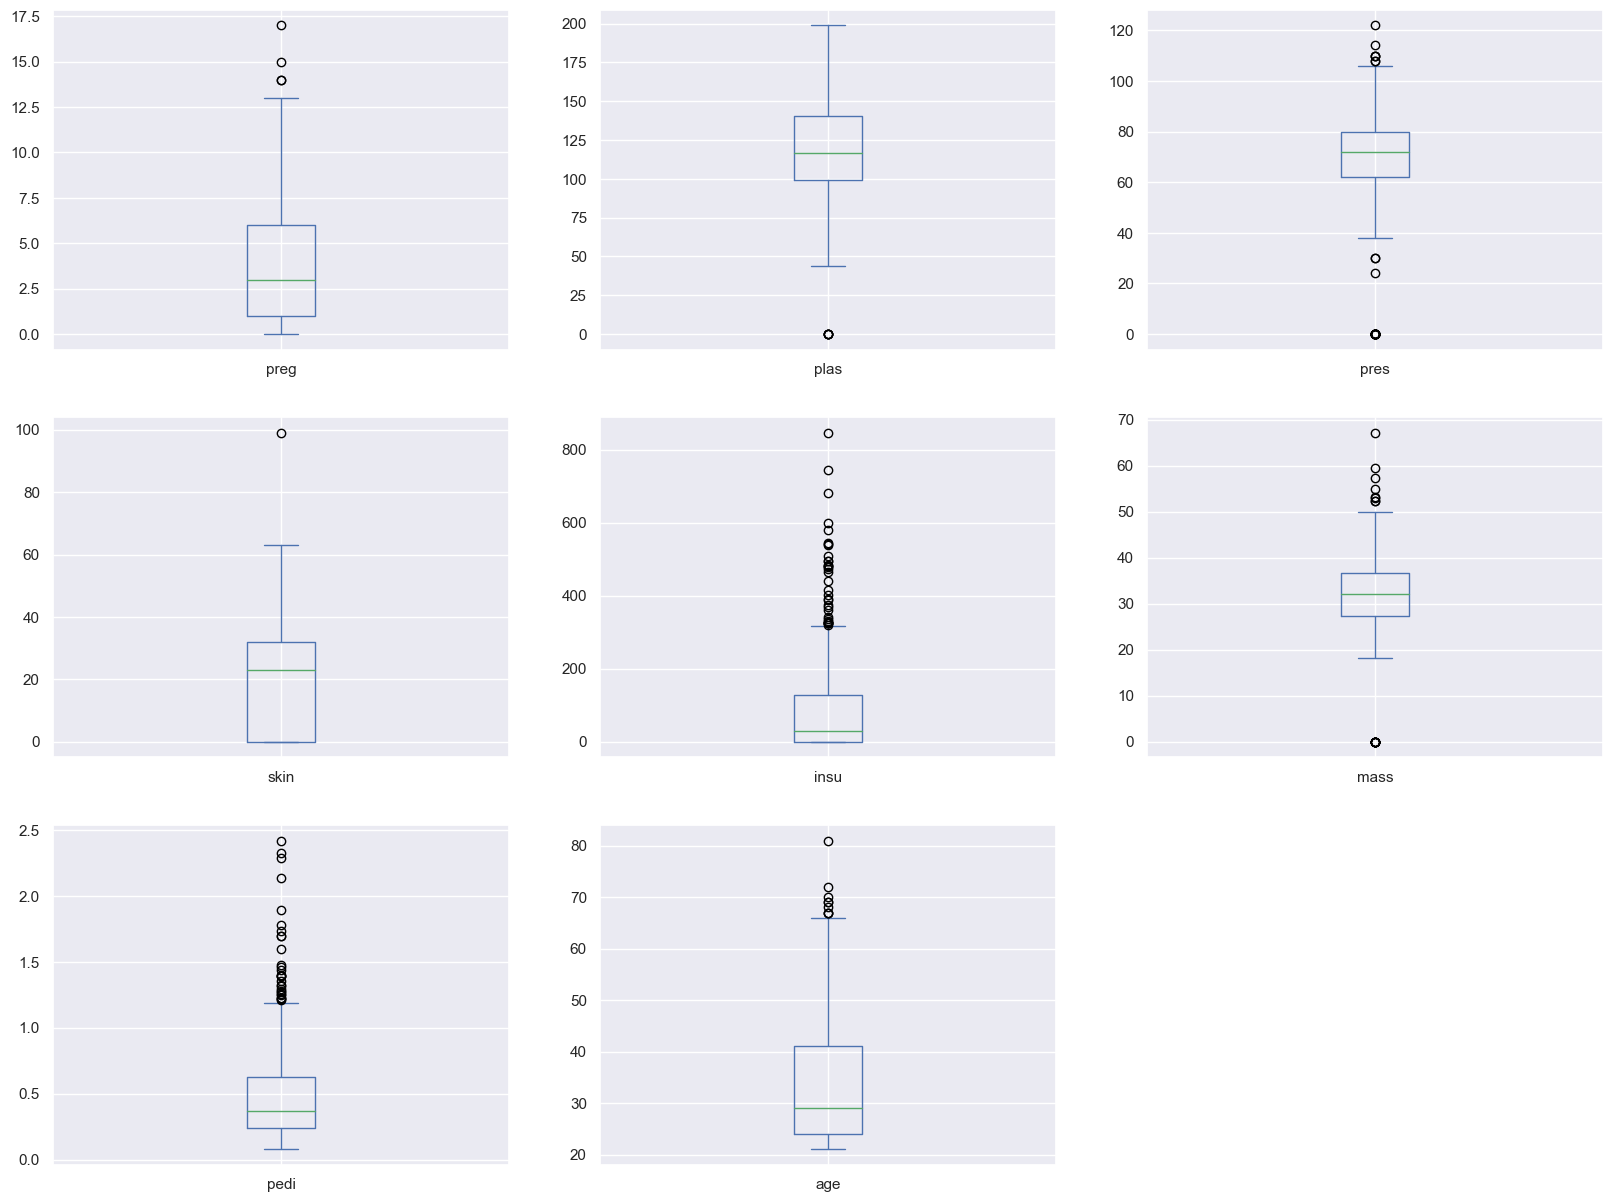

In [9]:
# Box and Whisker plot to visualize the distribution of all atributes
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))
plt.show()

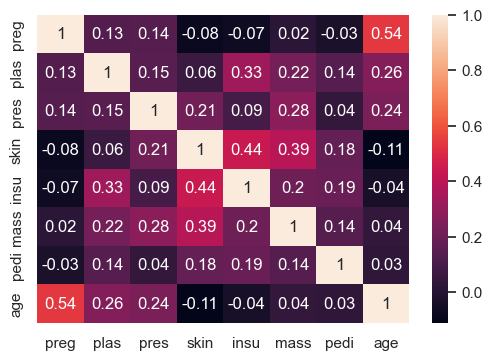

In [14]:
# Correlation between the different characteristics. Closer to 1 better is the correlation.
sns.heatmap(round(df.corr(method='pearson'),2), annot = True)
plt.show()

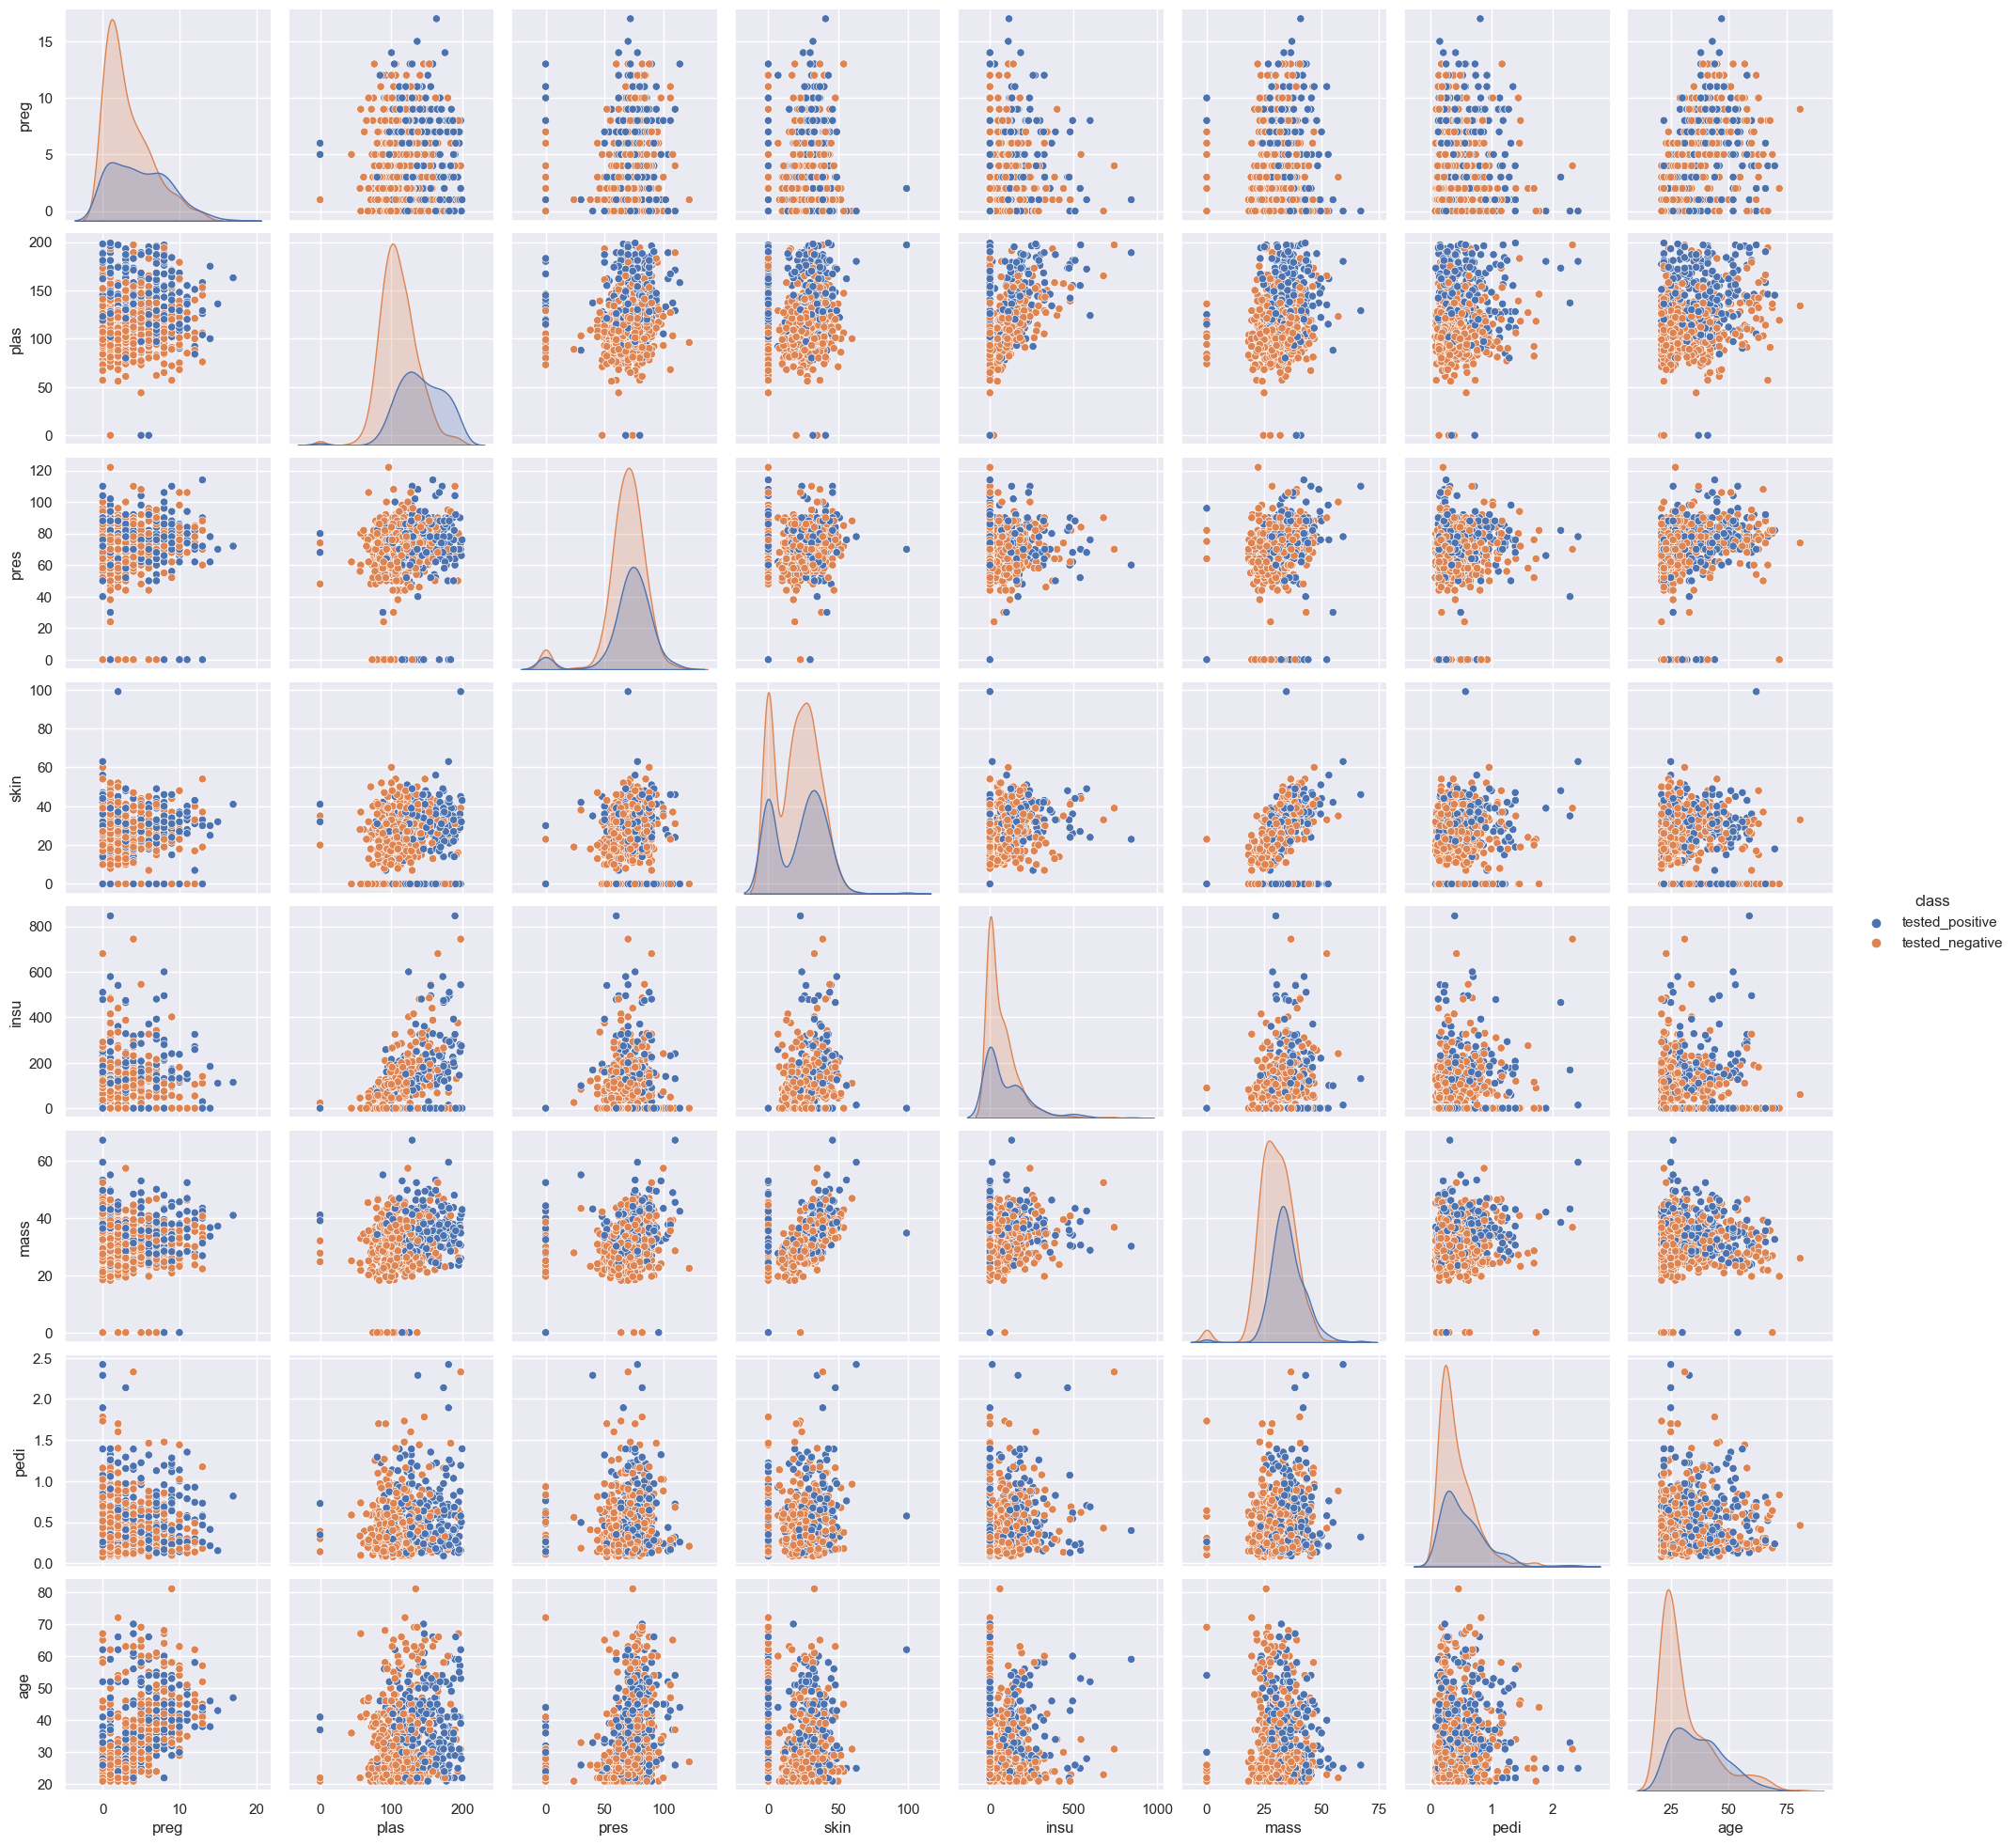

In [15]:
# Pairplot
sns.pairplot(df, hue='class')
plt.show()

In [20]:
df['classification'] = df['class'].apply(lambda x: 1 if x=='tested_negative' else 0)
# Remove two columns name is 'class'
df.drop(['class'], axis=1, inplace=True)
df.head(10)

,preg,plas,pres,skin,insu,mass,pedi,age,classification
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0
5,5,116,74,0,0,25.6,0.201,30,1
6,3,78,50,32,88,31.0,0.248,26,0
7,10,115,0,0,0,35.3,0.134,29,1
8,2,197,70,45,543,30.5,0.158,53,0
9,8,125,96,0,0,0.0,0.232,54,0


# Classification

In [21]:
# Split data
# X, Y = df.iloc[:,:-1], df.iloc[:,-1]
X, Y = df.drop(['classification'], axis = 1),  df['classification']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify = Y)

In [22]:
# Model initialization
lr_Classifier = LogisticRegression()
knn_Classifier = KNeighborsClassifier()
gnb_Classifier = GaussianNB()
dt_Classifier = DecisionTreeClassifier()
rf_Classifier = RandomForestClassifier()
model_list = [lr_Classifier, knn_Classifier, gnb_Classifier, dt_Classifier, rf_Classifier]

# Scaler initialization
MinMax_scaler = MinMaxScaler()
Standard_scaler = StandardScaler()
MaxAbs_scaler = MaxAbsScaler()
Robust_scaler = RobustScaler()
Quantile_scaler = QuantileTransformer()
Power_scaler = PowerTransformer()
Normalizer_scaler = Normalizer()
scaler_list = [MinMax_scaler, Standard_scaler, MaxAbs_scaler, Robust_scaler, 
               Quantile_scaler, Power_scaler, Normalizer_scaler]

In [33]:
def run_pipeline(X_train, X_test, y_train, y_test, scaler, classifier):
    # Model Information
    print(f"Modele name : {type(classifier).__name__}")
    print(f"Scaler name : {type(scaler).__name__}")
    
    # process 1 : fit and transform X_train data
    scaled_X_train = scaler.fit_transform(X_train)
    
    # process 2 : train model
    classifier.fit(scaled_X_train, y_train)  
    
    # process 3 : transform X_test data
    scaled_X_test = scaler.transform(X_test)
    
    # process 4 : test model
    y_pred = classifier.predict(scaled_X_test)
    # print(y_pred, le.inverse_transform(y_pred))
    
    # process 5 : model evalution
    print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')
    print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')
    print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')
    print("Classification_report:\n",metrics.classification_report(y_test, y_pred))
    print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
    # plot confusion_matrix
    fig, ax = plt.subplots()
    fig.set_size_inches(6,4) # WH
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True,
                fmt=".1f",
                linewidths = 2,
                linecolor = "blue",
                center=0)
    plt.show()
    
    # process 6 : save model in pkl file
    filename = f'Moduls\\{str(type(classifier).__name__)}_{str(type(scaler).__name__)}_03_Disease_Prediction.pkl'
    pickle.dump(classifier, open(filename, 'wb'))
    
    # collect data for bar plot
    global plot_data_list
    plot_data_list.append([str(type(classifier).__name__), 
                           str(type(scaler).__name__), 
                           round((accuracy_score(y_test, y_pred))*100,2)])
    
    # end 
    print("==="*30)
    print("\n\n")
    time.sleep(0.5)

Modele name : LogisticRegression
Scaler name : MinMaxScaler
Accuracy_score: 76.19 %
Loss: 23.81 %
Cohen_kappa_score: 43.72 %
Classification_report:
               precision    recall  f1-score   support

           0       0.73      0.51      0.60        81
           1       0.77      0.90      0.83       150

    accuracy                           0.76       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.76      0.76      0.75       231

confusion_matrix:
 [[ 41  40]
 [ 15 135]]


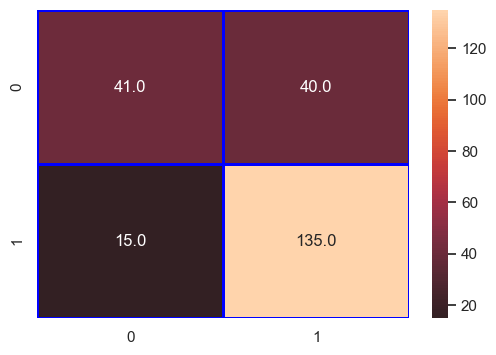




Modele name : LogisticRegression
Scaler name : StandardScaler
Accuracy_score: 77.92 %
Loss: 22.08 %
Cohen_kappa_score: 49.36 %
Classification_report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.65        81
           1       0.80      0.88      0.84       150

    accuracy                           0.78       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.78      0.77       231

confusion_matrix:
 [[ 48  33]
 [ 18 132]]


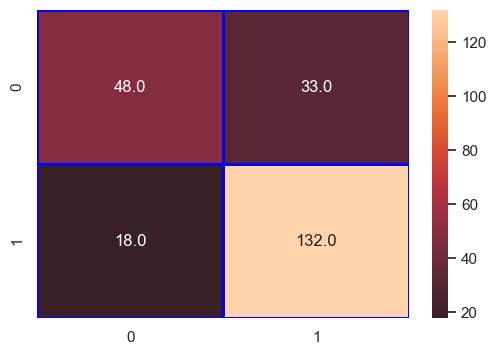




Modele name : LogisticRegression
Scaler name : MaxAbsScaler
Accuracy_score: 76.19 %
Loss: 23.81 %
Cohen_kappa_score: 43.72 %
Classification_report:
               precision    recall  f1-score   support

           0       0.73      0.51      0.60        81
           1       0.77      0.90      0.83       150

    accuracy                           0.76       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.76      0.76      0.75       231

confusion_matrix:
 [[ 41  40]
 [ 15 135]]


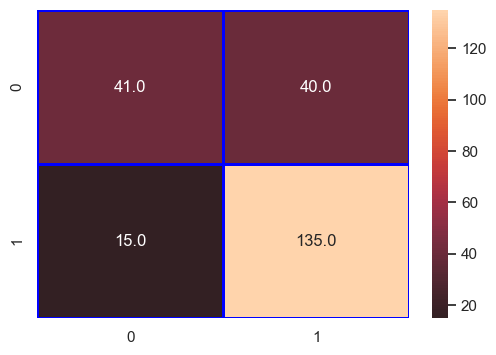




Modele name : LogisticRegression
Scaler name : RobustScaler
Accuracy_score: 77.92 %
Loss: 22.08 %
Cohen_kappa_score: 49.36 %
Classification_report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.65        81
           1       0.80      0.88      0.84       150

    accuracy                           0.78       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.78      0.77       231

confusion_matrix:
 [[ 48  33]
 [ 18 132]]


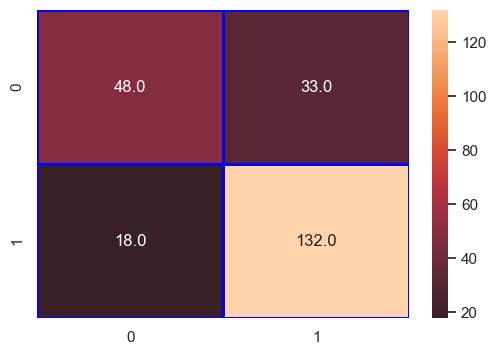




Modele name : LogisticRegression
Scaler name : QuantileTransformer
Accuracy_score: 77.06 %
Loss: 22.94 %
Cohen_kappa_score: 47.69 %
Classification_report:
               precision    recall  f1-score   support

           0       0.71      0.59      0.64        81
           1       0.80      0.87      0.83       150

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231

confusion_matrix:
 [[ 48  33]
 [ 20 130]]


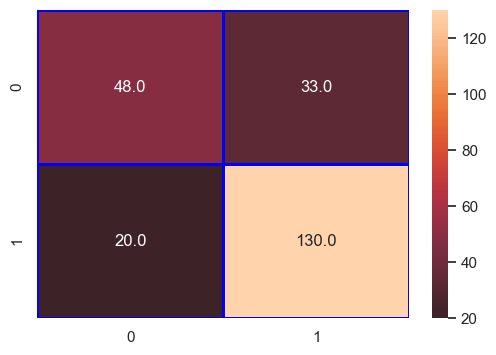




Modele name : LogisticRegression
Scaler name : PowerTransformer
Accuracy_score: 75.76 %
Loss: 24.24 %
Cohen_kappa_score: 44.89 %
Classification_report:
               precision    recall  f1-score   support

           0       0.68      0.58      0.63        81
           1       0.79      0.85      0.82       150

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.76      0.75       231

confusion_matrix:
 [[ 47  34]
 [ 22 128]]


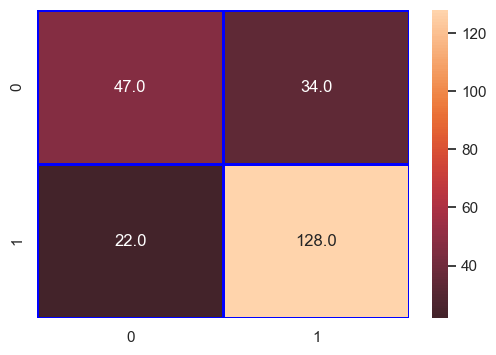




Modele name : LogisticRegression
Scaler name : Normalizer
Accuracy_score: 64.07 %
Loss: 35.93 %
Cohen_kappa_score: 3.91 %
Classification_report:
               precision    recall  f1-score   support

           0       0.44      0.10      0.16        81
           1       0.66      0.93      0.77       150

    accuracy                           0.64       231
   macro avg       0.55      0.52      0.47       231
weighted avg       0.58      0.64      0.56       231

confusion_matrix:
 [[  8  73]
 [ 10 140]]


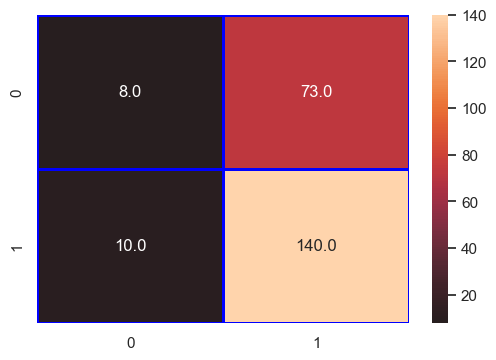

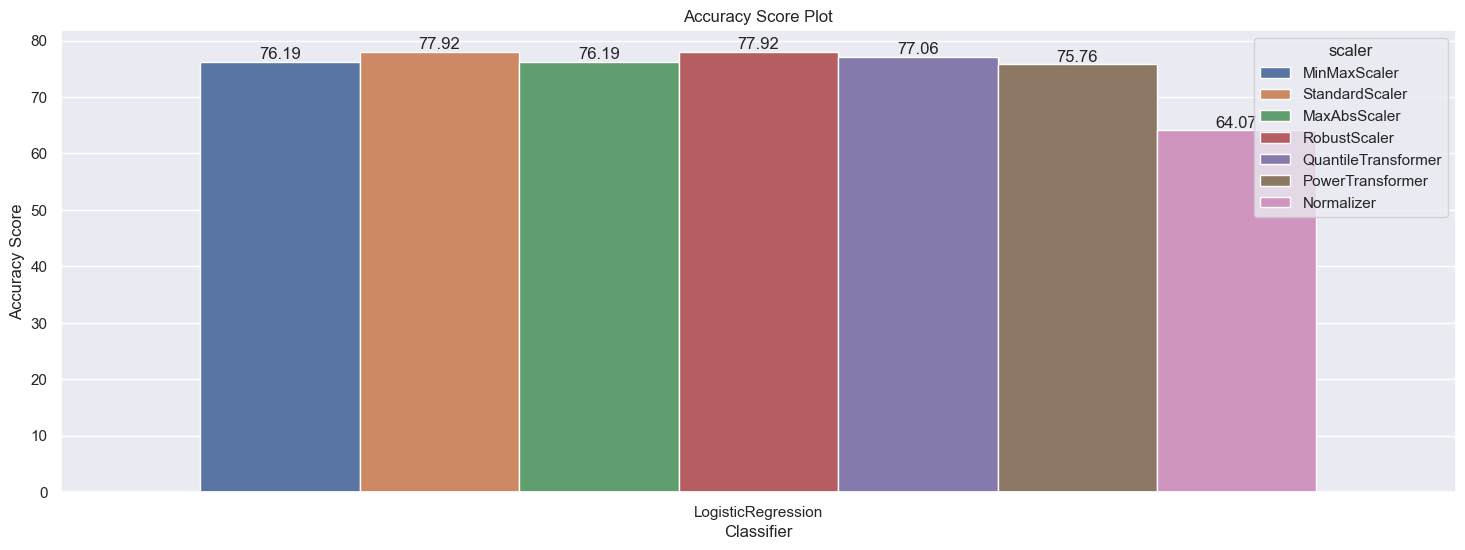




Modele name : KNeighborsClassifier
Scaler name : MinMaxScaler
Accuracy_score: 76.19 %
Loss: 23.81 %
Cohen_kappa_score: 46.03 %
Classification_report:
               precision    recall  f1-score   support

           0       0.69      0.59      0.64        81
           1       0.80      0.85      0.82       150

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231

confusion_matrix:
 [[ 48  33]
 [ 22 128]]


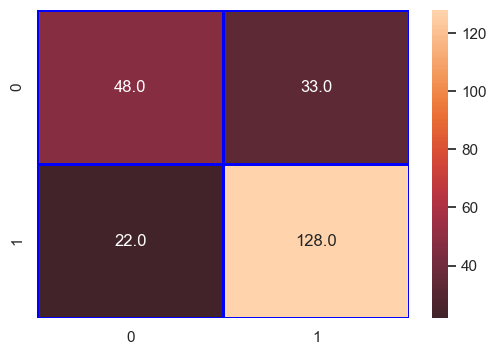




Modele name : KNeighborsClassifier
Scaler name : StandardScaler
Accuracy_score: 72.29 %
Loss: 27.71 %
Cohen_kappa_score: 35.11 %
Classification_report:
               precision    recall  f1-score   support

           0       0.64      0.47      0.54        81
           1       0.75      0.86      0.80       150

    accuracy                           0.72       231
   macro avg       0.70      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231

confusion_matrix:
 [[ 38  43]
 [ 21 129]]


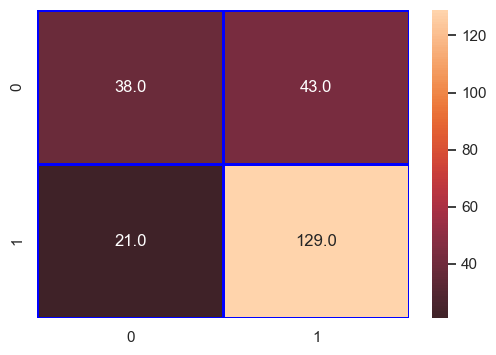




Modele name : KNeighborsClassifier
Scaler name : MaxAbsScaler
Accuracy_score: 74.03 %
Loss: 25.97 %
Cohen_kappa_score: 39.53 %
Classification_report:
               precision    recall  f1-score   support

           0       0.67      0.51      0.58        81
           1       0.76      0.87      0.81       150

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231

confusion_matrix:
 [[ 41  40]
 [ 20 130]]


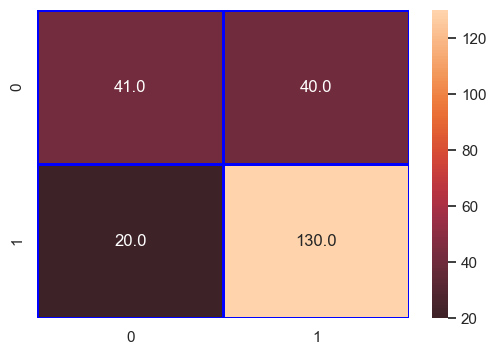




Modele name : KNeighborsClassifier
Scaler name : RobustScaler
Accuracy_score: 72.73 %
Loss: 27.27 %
Cohen_kappa_score: 36.7 %
Classification_report:
               precision    recall  f1-score   support

           0       0.65      0.49      0.56        81
           1       0.76      0.85      0.80       150

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231

confusion_matrix:
 [[ 40  41]
 [ 22 128]]


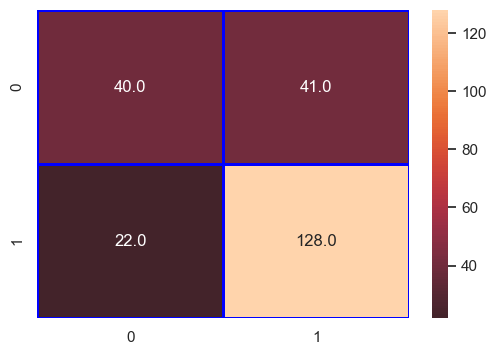




Modele name : KNeighborsClassifier
Scaler name : QuantileTransformer
Accuracy_score: 73.16 %
Loss: 26.84 %
Cohen_kappa_score: 38.26 %
Classification_report:
               precision    recall  f1-score   support

           0       0.65      0.52      0.58        81
           1       0.77      0.85      0.80       150

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231

confusion_matrix:
 [[ 42  39]
 [ 23 127]]


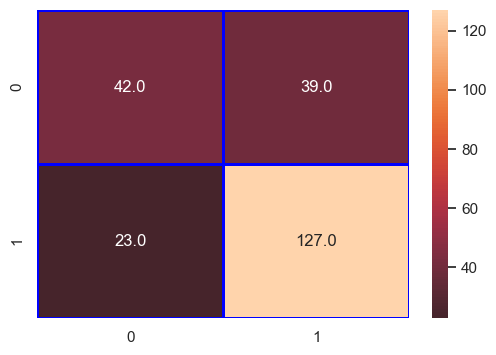




Modele name : KNeighborsClassifier
Scaler name : PowerTransformer
Accuracy_score: 73.59 %
Loss: 26.41 %
Cohen_kappa_score: 37.58 %
Classification_report:
               precision    recall  f1-score   support

           0       0.68      0.47      0.55        81
           1       0.75      0.88      0.81       150

    accuracy                           0.74       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231

confusion_matrix:
 [[ 38  43]
 [ 18 132]]


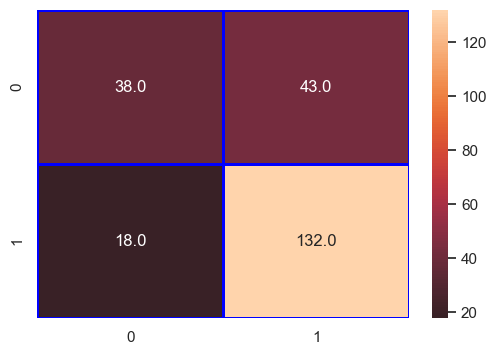




Modele name : KNeighborsClassifier
Scaler name : Normalizer
Accuracy_score: 70.13 %
Loss: 29.87 %
Cohen_kappa_score: 32.29 %
Classification_report:
               precision    recall  f1-score   support

           0       0.59      0.51      0.54        81
           1       0.75      0.81      0.78       150

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.70      0.70       231

confusion_matrix:
 [[ 41  40]
 [ 29 121]]


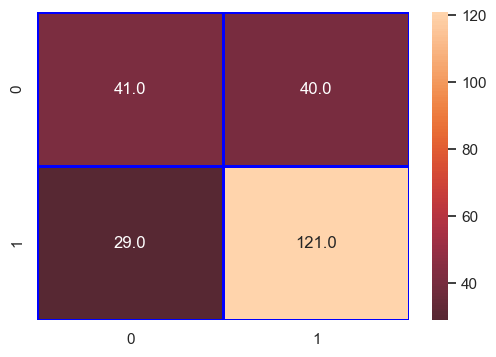

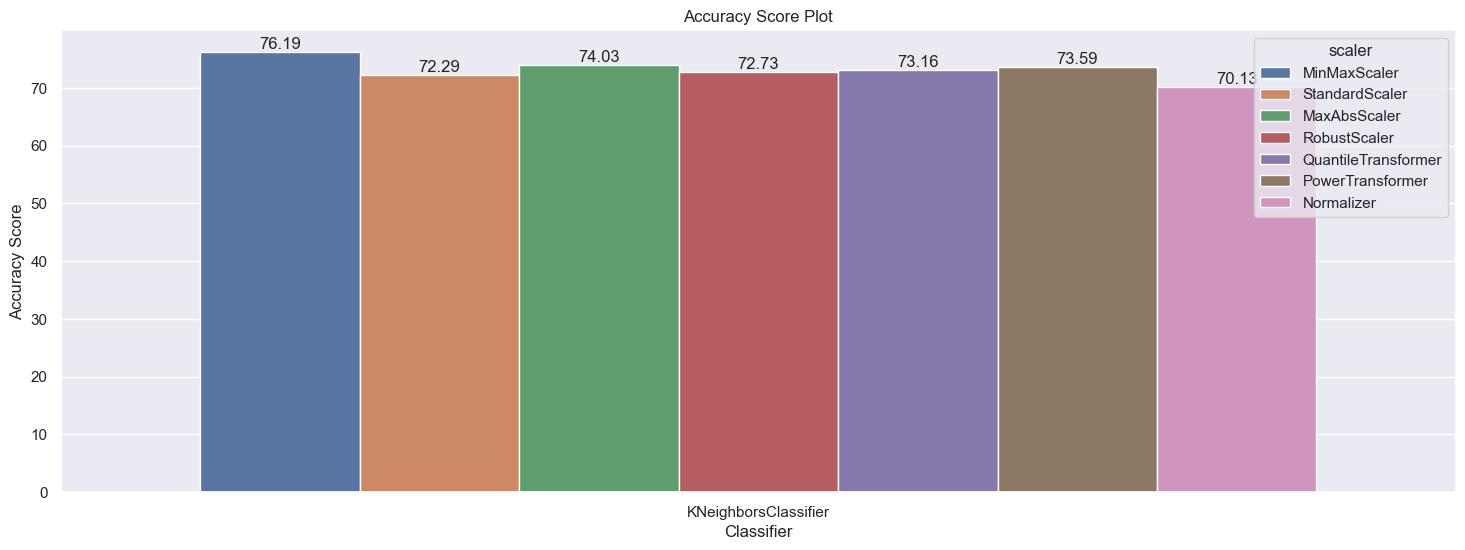




Modele name : GaussianNB
Scaler name : MinMaxScaler
Accuracy_score: 75.76 %
Loss: 24.24 %
Cohen_kappa_score: 44.89 %
Classification_report:
               precision    recall  f1-score   support

           0       0.68      0.58      0.63        81
           1       0.79      0.85      0.82       150

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.76      0.75       231

confusion_matrix:
 [[ 47  34]
 [ 22 128]]


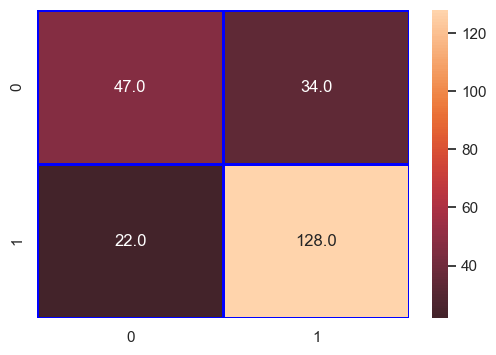




Modele name : GaussianNB
Scaler name : StandardScaler
Accuracy_score: 75.76 %
Loss: 24.24 %
Cohen_kappa_score: 44.89 %
Classification_report:
               precision    recall  f1-score   support

           0       0.68      0.58      0.63        81
           1       0.79      0.85      0.82       150

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.76      0.75       231

confusion_matrix:
 [[ 47  34]
 [ 22 128]]


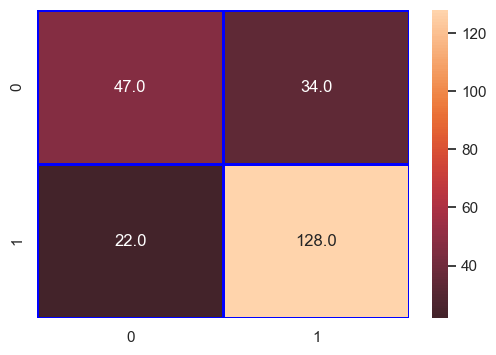




Modele name : GaussianNB
Scaler name : MaxAbsScaler
Accuracy_score: 75.76 %
Loss: 24.24 %
Cohen_kappa_score: 44.89 %
Classification_report:
               precision    recall  f1-score   support

           0       0.68      0.58      0.63        81
           1       0.79      0.85      0.82       150

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.76      0.75       231

confusion_matrix:
 [[ 47  34]
 [ 22 128]]


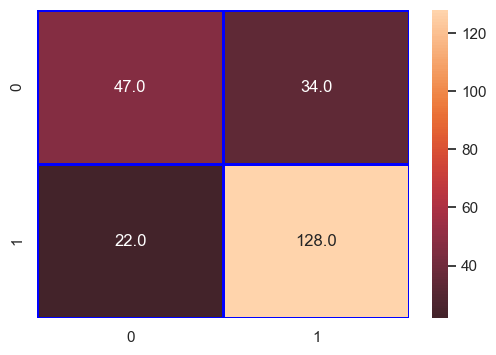




Modele name : GaussianNB
Scaler name : RobustScaler
Accuracy_score: 75.76 %
Loss: 24.24 %
Cohen_kappa_score: 44.89 %
Classification_report:
               precision    recall  f1-score   support

           0       0.68      0.58      0.63        81
           1       0.79      0.85      0.82       150

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.76      0.75       231

confusion_matrix:
 [[ 47  34]
 [ 22 128]]


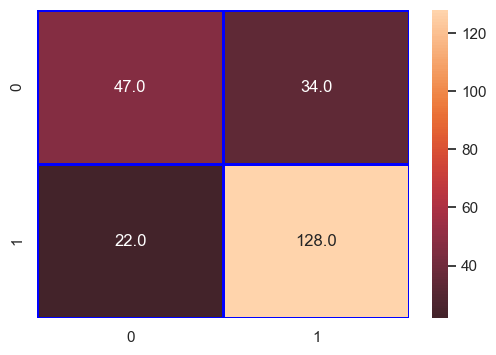




Modele name : GaussianNB
Scaler name : QuantileTransformer
Accuracy_score: 76.62 %
Loss: 23.38 %
Cohen_kappa_score: 48.08 %
Classification_report:
               precision    recall  f1-score   support

           0       0.68      0.64      0.66        81
           1       0.81      0.83      0.82       150

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231

confusion_matrix:
 [[ 52  29]
 [ 25 125]]


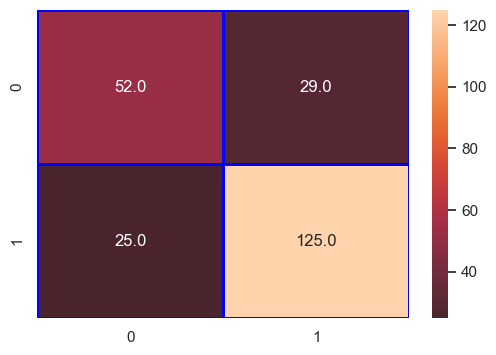




Modele name : GaussianNB
Scaler name : PowerTransformer
Accuracy_score: 76.62 %
Loss: 23.38 %
Cohen_kappa_score: 47.78 %
Classification_report:
               precision    recall  f1-score   support

           0       0.68      0.63      0.65        81
           1       0.81      0.84      0.82       150

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231

confusion_matrix:
 [[ 51  30]
 [ 24 126]]


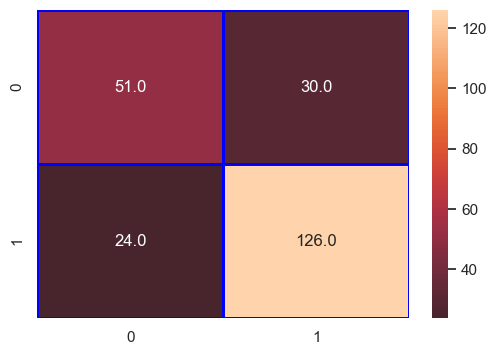




Modele name : GaussianNB
Scaler name : Normalizer
Accuracy_score: 64.94 %
Loss: 35.06 %
Cohen_kappa_score: 13.41 %
Classification_report:
               precision    recall  f1-score   support

           0       0.50      0.26      0.34        81
           1       0.68      0.86      0.76       150

    accuracy                           0.65       231
   macro avg       0.59      0.56      0.55       231
weighted avg       0.62      0.65      0.61       231

confusion_matrix:
 [[ 21  60]
 [ 21 129]]


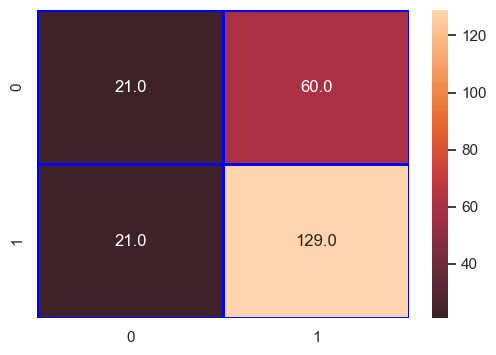

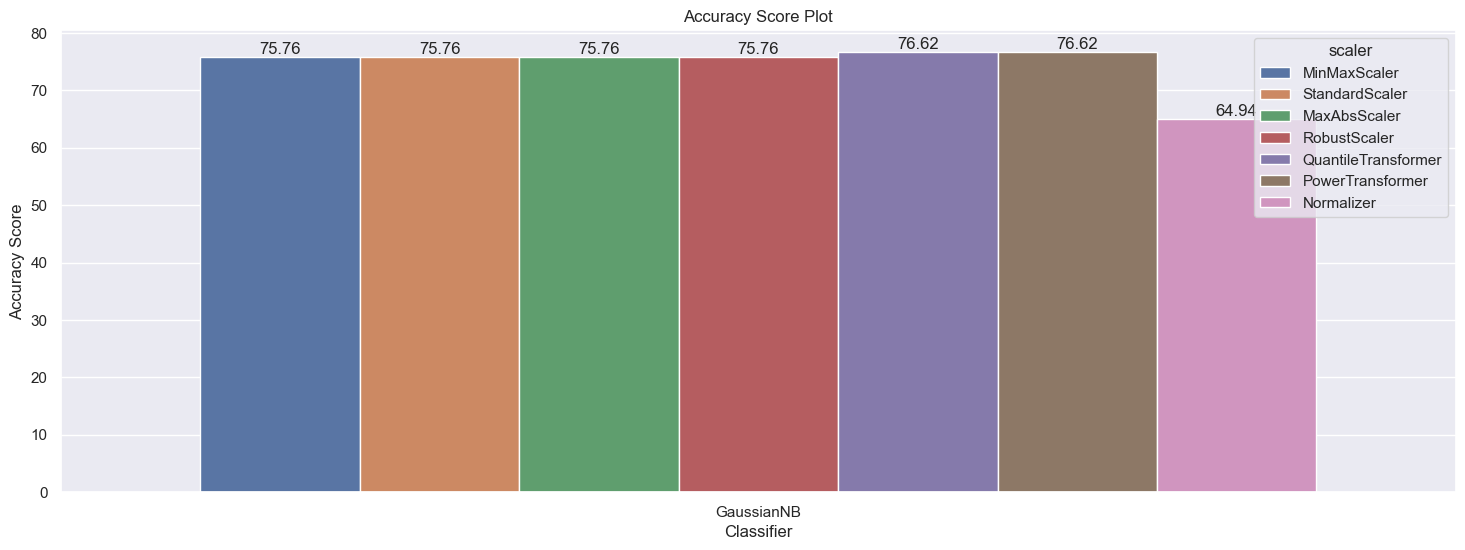




Modele name : DecisionTreeClassifier
Scaler name : MinMaxScaler
Accuracy_score: 68.4 %
Loss: 31.6 %
Cohen_kappa_score: 30.41 %
Classification_report:
               precision    recall  f1-score   support

           0       0.55      0.54      0.55        81
           1       0.75      0.76      0.76       150

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231

confusion_matrix:
 [[ 44  37]
 [ 36 114]]


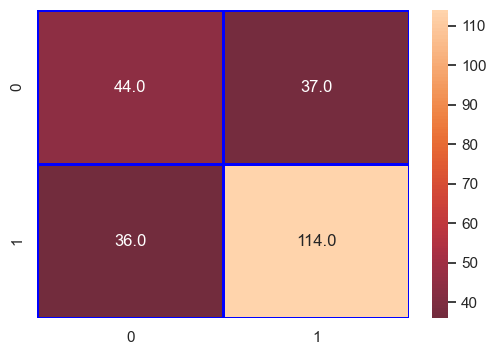




Modele name : DecisionTreeClassifier
Scaler name : StandardScaler
Accuracy_score: 68.83 %
Loss: 31.17 %
Cohen_kappa_score: 30.77 %
Classification_report:
               precision    recall  f1-score   support

           0       0.56      0.53      0.54        81
           1       0.75      0.77      0.76       150

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.69      0.69       231

confusion_matrix:
 [[ 43  38]
 [ 34 116]]


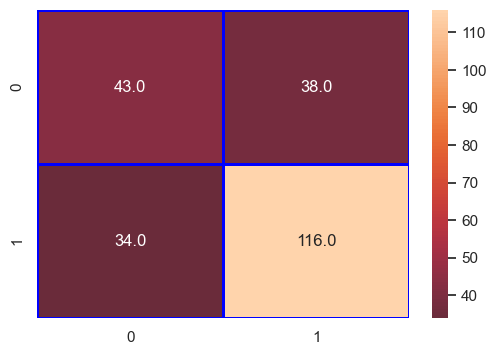




Modele name : DecisionTreeClassifier
Scaler name : MaxAbsScaler
Accuracy_score: 70.56 %
Loss: 29.44 %
Cohen_kappa_score: 33.47 %
Classification_report:
               precision    recall  f1-score   support

           0       0.59      0.52      0.55        81
           1       0.76      0.81      0.78       150

    accuracy                           0.71       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231

confusion_matrix:
 [[ 42  39]
 [ 29 121]]


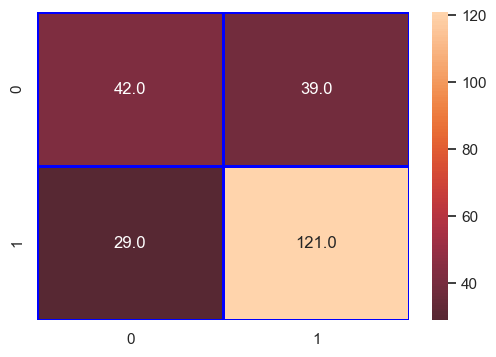




Modele name : DecisionTreeClassifier
Scaler name : RobustScaler
Accuracy_score: 67.97 %
Loss: 32.03 %
Cohen_kappa_score: 28.44 %
Classification_report:
               precision    recall  f1-score   support

           0       0.55      0.51      0.53        81
           1       0.74      0.77      0.76       150

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.67      0.68      0.68       231

confusion_matrix:
 [[ 41  40]
 [ 34 116]]


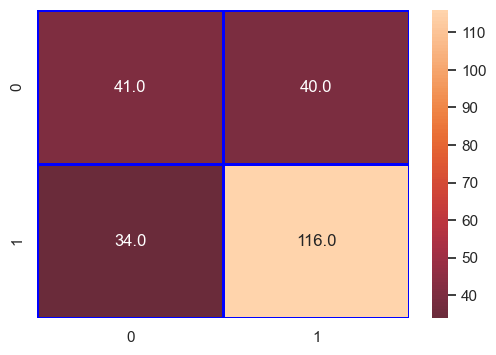




Modele name : DecisionTreeClassifier
Scaler name : QuantileTransformer
Accuracy_score: 68.4 %
Loss: 31.6 %
Cohen_kappa_score: 30.01 %
Classification_report:
               precision    recall  f1-score   support

           0       0.55      0.53      0.54        81
           1       0.75      0.77      0.76       150

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231

confusion_matrix:
 [[ 43  38]
 [ 35 115]]


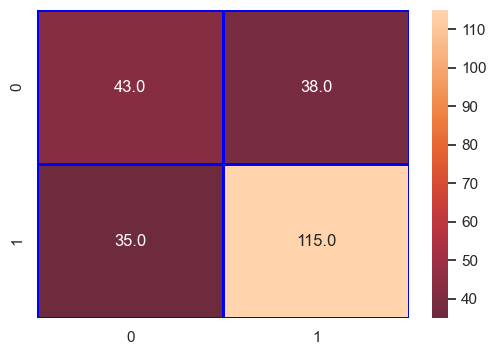




Modele name : DecisionTreeClassifier
Scaler name : PowerTransformer
Accuracy_score: 70.56 %
Loss: 29.44 %
Cohen_kappa_score: 34.24 %
Classification_report:
               precision    recall  f1-score   support

           0       0.59      0.54      0.56        81
           1       0.76      0.79      0.78       150

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231

confusion_matrix:
 [[ 44  37]
 [ 31 119]]


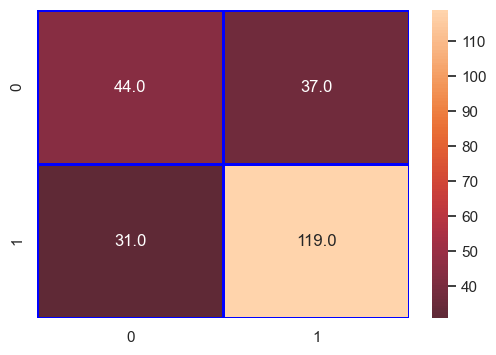




Modele name : DecisionTreeClassifier
Scaler name : Normalizer
Accuracy_score: 62.77 %
Loss: 37.23 %
Cohen_kappa_score: 19.17 %
Classification_report:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48        81
           1       0.72      0.70      0.71       150

    accuracy                           0.63       231
   macro avg       0.59      0.60      0.60       231
weighted avg       0.63      0.63      0.63       231

confusion_matrix:
 [[ 40  41]
 [ 45 105]]


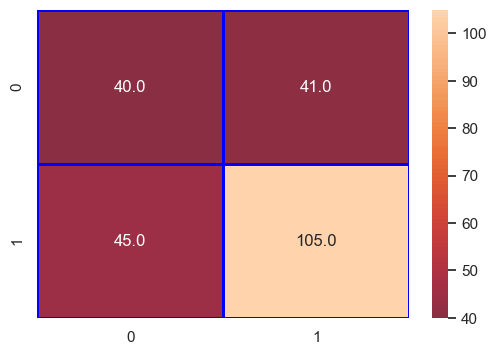

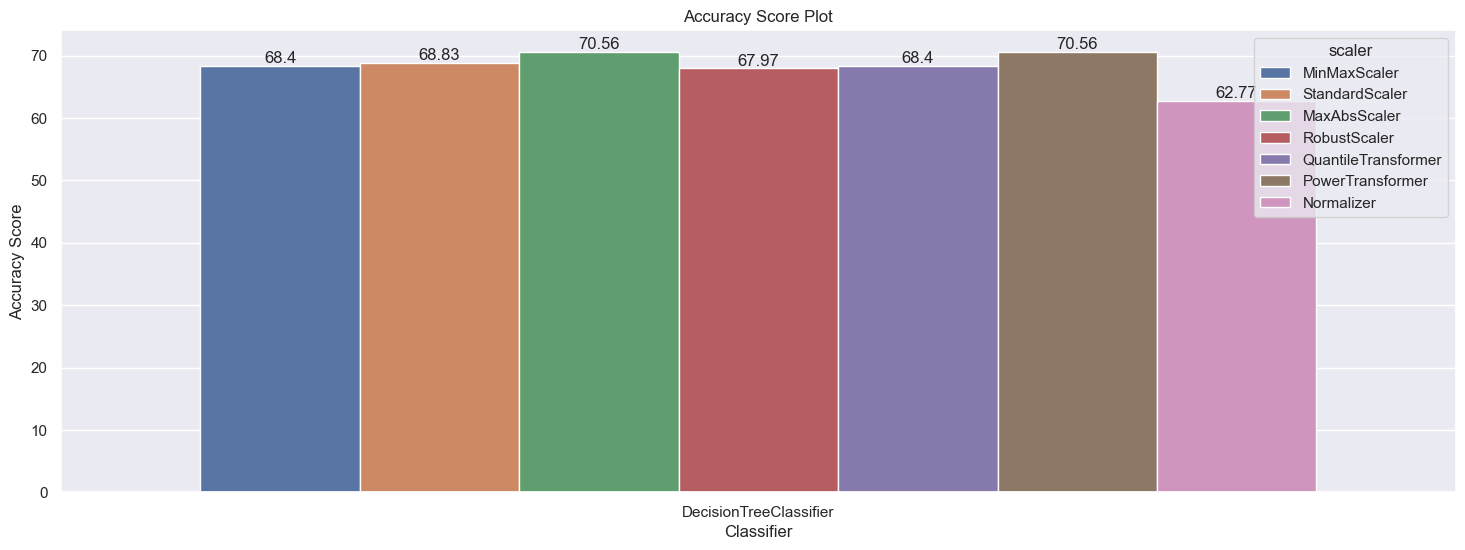




Modele name : RandomForestClassifier
Scaler name : MinMaxScaler
Accuracy_score: 74.89 %
Loss: 25.11 %
Cohen_kappa_score: 42.92 %
Classification_report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.61        81
           1       0.78      0.85      0.81       150

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231

confusion_matrix:
 [[ 46  35]
 [ 23 127]]


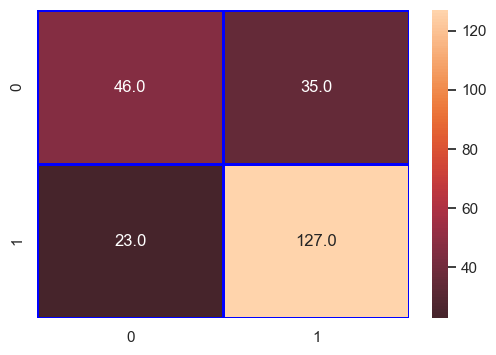




Modele name : RandomForestClassifier
Scaler name : StandardScaler
Accuracy_score: 74.89 %
Loss: 25.11 %
Cohen_kappa_score: 43.25 %
Classification_report:
               precision    recall  f1-score   support

           0       0.66      0.58      0.62        81
           1       0.79      0.84      0.81       150

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.74       231

confusion_matrix:
 [[ 47  34]
 [ 24 126]]


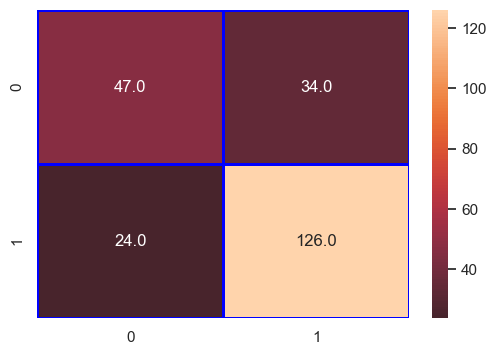




Modele name : RandomForestClassifier
Scaler name : MaxAbsScaler
Accuracy_score: 74.89 %
Loss: 25.11 %
Cohen_kappa_score: 41.89 %
Classification_report:
               precision    recall  f1-score   support

           0       0.68      0.53      0.60        81
           1       0.77      0.87      0.82       150

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231

confusion_matrix:
 [[ 43  38]
 [ 20 130]]


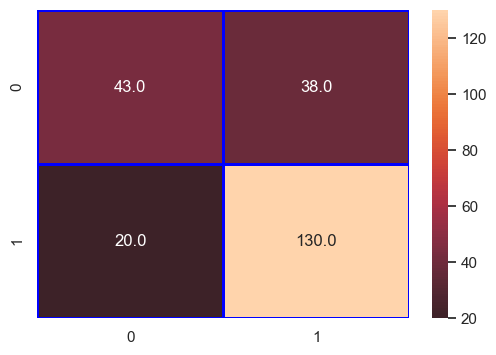




Modele name : RandomForestClassifier
Scaler name : RobustScaler
Accuracy_score: 77.06 %
Loss: 22.94 %
Cohen_kappa_score: 48.3 %
Classification_report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65        81
           1       0.81      0.85      0.83       150

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231

confusion_matrix:
 [[ 50  31]
 [ 22 128]]


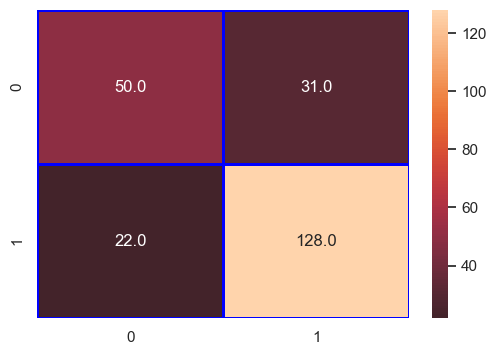




Modele name : RandomForestClassifier
Scaler name : QuantileTransformer
Accuracy_score: 75.76 %
Loss: 24.24 %
Cohen_kappa_score: 44.56 %
Classification_report:
               precision    recall  f1-score   support

           0       0.69      0.57      0.62        81
           1       0.79      0.86      0.82       150

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231

confusion_matrix:
 [[ 46  35]
 [ 21 129]]


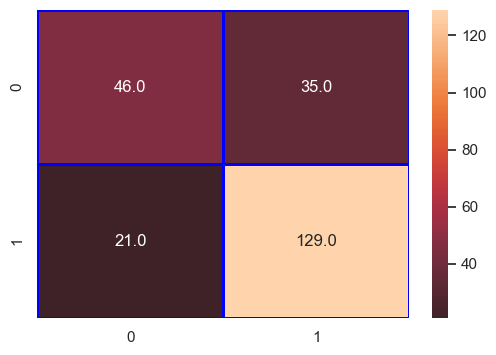




Modele name : RandomForestClassifier
Scaler name : PowerTransformer
Accuracy_score: 74.46 %
Loss: 25.54 %
Cohen_kappa_score: 42.11 %
Classification_report:
               precision    recall  f1-score   support

           0       0.66      0.57      0.61        81
           1       0.78      0.84      0.81       150

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

confusion_matrix:
 [[ 46  35]
 [ 24 126]]


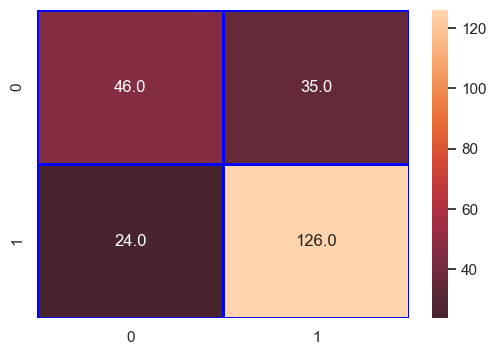




Modele name : RandomForestClassifier
Scaler name : Normalizer
Accuracy_score: 68.4 %
Loss: 31.6 %
Cohen_kappa_score: 25.76 %
Classification_report:
               precision    recall  f1-score   support

           0       0.57      0.41      0.47        81
           1       0.72      0.83      0.77       150

    accuracy                           0.68       231
   macro avg       0.65      0.62      0.62       231
weighted avg       0.67      0.68      0.67       231

confusion_matrix:
 [[ 33  48]
 [ 25 125]]


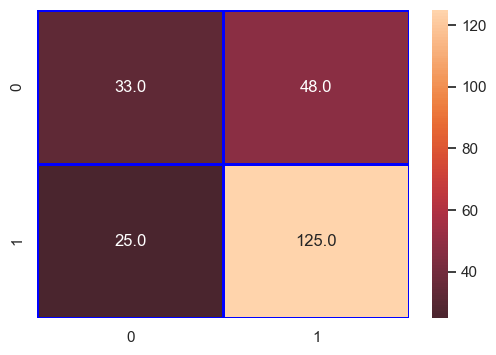

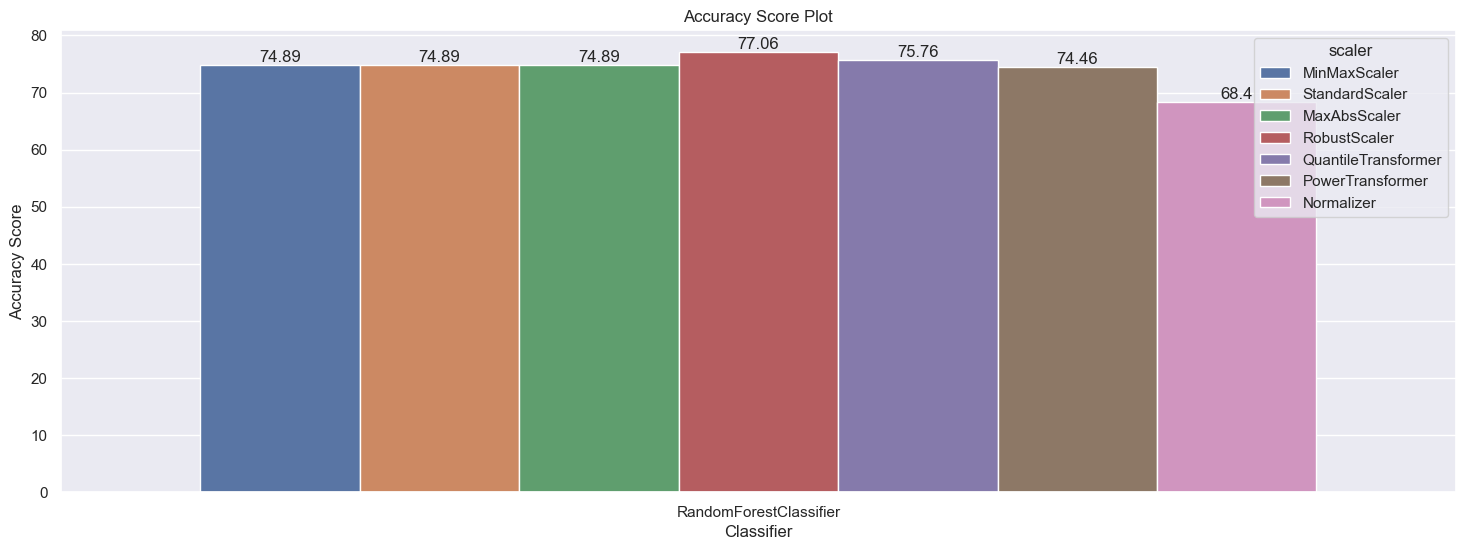




Done...


In [34]:
for model in model_list:
    for scaler in scaler_list:
        run_pipeline(X_train, X_test, y_train, y_test, scaler, model)
    
    # plot data
    plot_df = pd.DataFrame(plot_data_list, columns=['classifier', 'scaler', 'accuracy_score'])
    plot_df.to_csv(f"Dataset\\{str(type(model).__name__)}_accuracy_score_plot_data_03_Disease_Prediction.csv", index=False)
    sns.set(rc={'figure.figsize':(18,6)})
    ax = sns.barplot(data=plot_df, x="classifier", y="accuracy_score", hue="scaler")
    plt.title('Accuracy Score Plot')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy Score')
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()
    
    # empty list
    plot_data_list = []
    print("\n\n")
    
print("Done...")